#Student Name: 
#ECE 595 Machine Learning II
#Project 2: Autoencoders - Student Code

In [1]:
#Import necessary packages
import keras
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras import backend as K

Using TensorFlow backend.


#Part 0: Importing and Normalizing Data

In [2]:
#Load MNIST data and normalize to [0,1]
(data_train, _), (data_test, _) = mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0

11501568/11490434 [==============================] - 1s 0us/step


#Part 1: Deep Fully-Connected AutoEncoder

Answer the following questions: 


1.  We want to predict output values of the intensity of the pixels which are between 0 to 1. Therefore choice of output layer activation function is important. (Open ended reasoning question). (a) Choose 'softmax’ or ‘sigmoid’. Reason why one is preferred over the other.
**Since the input data is binary numbers, decoder and encoder will typically be sigmoid functions. Sigmoid function maps the input and output ranging from 0 and 1, which is mostly used in binary classification.**
 

In [34]:
#Reshape training and testing data into 784-dimensional vectors
data_train = data_train.reshape(60000, 784)
data_test = data_test.reshape(10000, 784)

**2a. Plot the model loss versus the epochs for both the training and validation data for Binary Cross Entropy** **bold text**

In [7]:
#Create autoencoder architecture for BCE
def deep_ae():
    model = Sequential()

    # Encoder
    model.add(Dense(784,
              activation ="sigmoid",
              use_bias=True,
              kernel_initializer="uniform",
              input_dim=784))

    model.add(Dense(400,                   
             activation="relu",
             kernel_initializer="normal"))
    model.add(Dense(200,                   
             activation="relu",
             kernel_initializer="normal"))
    model.add(Dense(100,                      #bottleneck
             activation="relu",
             kernel_initializer="normal"))
    model.add(Dense(200,                   
             activation="relu",
             kernel_initializer="normal"))
    model.add(Dense(400,                   
             activation="relu",
             kernel_initializer="normal"))

    # Decoder
    model.add(Dense(784,
              activation ="sigmoid",
              kernel_initializer="uniform"))

    return model

#Create deep autoencoder graph
deep_ae = deep_ae()

#Compile model using an appropriate loss and optimizer algorithm
deep_ae.compile(loss ="binary_crossentropy",
                      optimizer="adam")
print(deep_ae.summary())
#Train the model and assign training meta-data to a variable
num_epochs = 150
batch_size = 1024
deep_ae_model_history = deep_ae.fit(data_train,data_train,
                                     validation_data=(data_test,data_test),
                                     epochs=num_epochs,
                                     batch_size=batch_size,
                                     shuffle=True)

#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions = deep_ae.predict(data_test)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[3].output])
data_test_hidden_layer_rep = get_hl([data_test])[0]

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_9 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_10 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_12 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_13 (Dense)             (None, 400)               80400     
_________________________________________________________________
dense_14 (Dense)             (None, 784)              

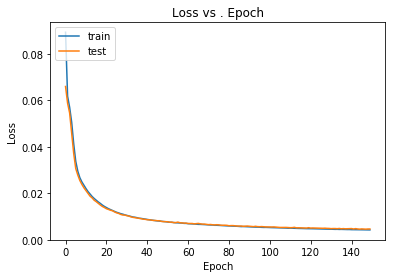

In [ ]:
#Plot loss vs epoch for BCE
plt.plot(deep_ae_model_history.history['loss'] )
plt.plot(deep_ae_model_history.history['val_loss'])
plt.title('Loss vs . Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc= 'upper left')
plt.show()

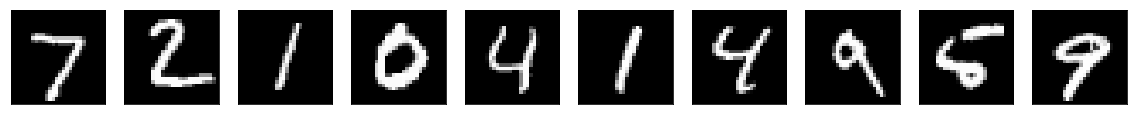

In [ ]:
#Show samples of 10 images, their hidden layer representations
n = 10
plt.figure(figsize=(20, 4))
for i in range (n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(data_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

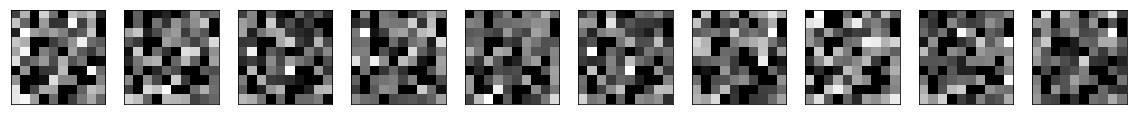

In [8]:
#Bottleneck layer representation
n = 10
plt.figure(figsize=(20, 4))
for i in range (n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(data_test_hidden_layer_rep[i].reshape(10,10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

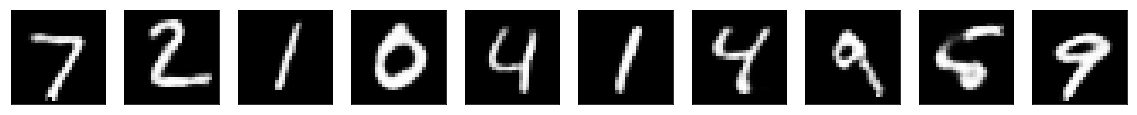

In [ ]:
#Reconstruction
n = 10
plt.figure(figsize=(20, 4))
for i in range (n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(reconstructions[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

**2b. Plot the model loss versus the epochs for both the training and validation data for Mean Squared Error** **bold text**

In [35]:
def deep_ae_MSE():
    model = Sequential()

    # Encoder
    model.add(Dense(784,
              activation ="sigmoid",
              use_bias=True,
              kernel_initializer="uniform",
              input_dim=784))

    model.add(Dense(400,                   
             activation="relu",
             kernel_initializer="normal"))
    model.add(Dense(200,                   
             activation="relu",
             kernel_initializer="normal"))
    model.add(Dense(100,                      #bottleneck
             activation="relu",
             kernel_initializer="normal"))
    model.add(Dense(200,                   
             activation="relu",
             kernel_initializer="normal"))
    model.add(Dense(400,                   
             activation="relu",
             kernel_initializer="normal"))

    # Decoder
    model.add(Dense(784,
              activation ="sigmoid",
              kernel_initializer="uniform"))

    return model

#Create deep autoencoder graph
deep_ae_MSE = deep_ae_MSE()

#Compile model using an appropriate loss and optimizer algorithm
deep_ae_MSE.compile(loss ="mean_squared_error",
                      optimizer="adam")

#Train the model and assign training meta-data to a variable
num_epochs = 150
batch_size = 1024
deep_ae_model_history = deep_ae_MSE.fit(data_train,data_train,
                                     validation_data=(data_test,data_test),
                                     epochs=num_epochs,
                                     batch_size=batch_size,
                                     shuffle=True)

#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions = deep_ae_MSE.predict(data_test)

#Obtain hidden representation of input data
get_hl = K.function([deep_ae_MSE.layers[0].input], [deep_ae_MSE.layers[3].output])
data_test_hidden_layer_rep = get_hl([data_test])[0]

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 1s 16us/step - loss: 0.0871 - val_loss: 0.0659
Epoch 2/150
60000/60000 [==============================] - 1s 13us/step - loss: 0.0617 - val_loss: 0.0588
Epoch 3/150
60000/60000 [==============================] - 1s 13us/step - loss: 0.0566 - val_loss: 0.0529
Epoch 4/150
60000/60000 [==============================] - 1s 13us/step - loss: 0.0500 - val_loss: 0.0463
Epoch 5/150
60000/60000 [==============================] - 1s 13us/step - loss: 0.0418 - val_loss: 0.0369
Epoch 6/150
60000/60000 [==============================] - 1s 14us/step - loss: 0.0347 - val_loss: 0.0320
Epoch 7/150
60000/60000 [==============================] - 1s 14us/step - loss: 0.0308 - val_loss: 0.0288
Epoch 8/150
60000/60000 [==============================] - 1s 14us/step - loss: 0.0278 - val_loss: 0.0261
Epoch 9/150
60000/60000 [==============================] - 1s 14us/step - loss: 0.0253 - val_loss: 0.0

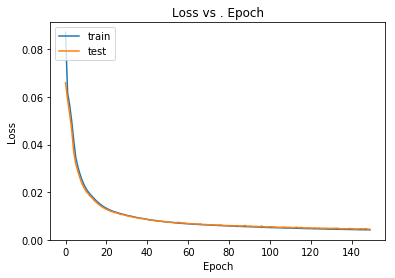

In [36]:
#Plot loss vs epoch for MSE
plt.plot(deep_ae_model_history.history['loss'] )
plt.plot(deep_ae_model_history.history['val_loss'])
plt.title('Loss vs . Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc= 'upper left')
plt.show()

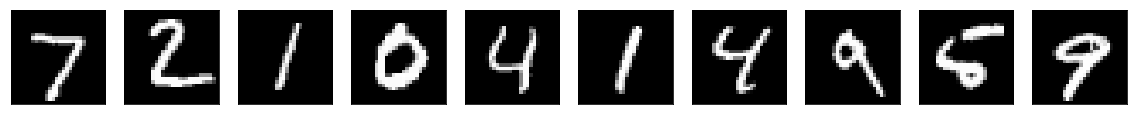

In [ ]:
#images of the first ten samples in the testing set
n = 10
plt.figure(figsize=(20, 4))
for i in range (n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(data_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

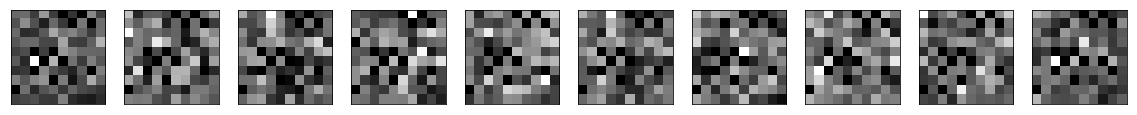

In [10]:
#Bottleneck layer representation
n = 10
plt.figure(figsize=(20, 4))
for i in range (n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(data_test_hidden_layer_rep[i].reshape(10,10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

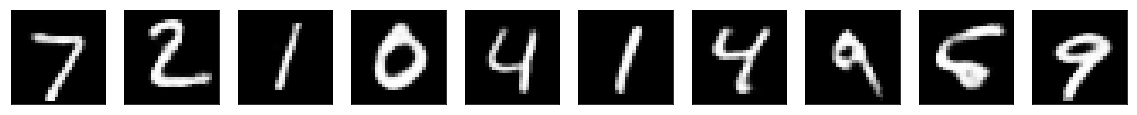

In [ ]:
#Reconstruction
n = 10
plt.figure(figsize=(20, 4))
for i in range (n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(reconstructions[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Answer the following questions: 


1.  Question 2c: BONUS [reasoning question]: Pair the output layer activation and loss function which performs better together. Linear, sigmoid, Binary cross entropy and Mean Square error
    <br>**Linear---Mean square error.**
    <br>**Sigmoid---Binary cross entropy.**
 

2.  Question 5: Which loss function is better and why?
    <br>**Binary cross entropy is better than Mean Square Error. Looking at the reconstruction and loss vs epoch, we could see that BCE makes the figure clear after reconsturction. Additionally, since the input is ranging from 0 and 1, BCE will be suitable.** 

3.  Question 6: If we were to predict pixels values [0 to 255] directly at the output of last layer. Should there be an activation function in last later?  If yes, which activation function and why?,  If No, reason why?
    <br>**If the input are real numbers, the output could have a linear function. The activation function could be softmax instead of sigmoid.**

#Part 2: Deep Convolutional AutoEncoder

In [17]:
#Reshape data into 2-D signals and account for grayscale channel in each image
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

**Part 2 1a. Loss versus the epochs for Mean Squared Error**

In [18]:
#Create Convolutional AutoEncoder Architecture
def cae():
    model = Sequential()

    model.add(keras.layers.InputLayer(input_shape = (28,28,1))) #input layer

    model.add (Conv2D(16,                                       #1
                     (3,3),                  
                     activation = 'relu',
                     padding = "same"))
    model.add(MaxPooling2D(pool_size=(2,2),                     #2 hiddenlayer : add a 2x2 maxpooling layer
                           padding='same'))
    model.add (Conv2D(8,                                        #3
                     (3,3),                  
                     activation = 'relu',
                     padding = "same"))
    model.add(MaxPooling2D(pool_size=(2,2),                      #bottleneck: 4 hiddenlayer : add a 2x2 maxpooling layer
                           padding='same'))
    model.add (Conv2D(8,                                         #5
                     (3,3),                  
                     activation = 'relu',
                     padding = "same"))
    model.add(UpSampling2D((2,2)))                               #6
    model.add (Conv2D(16,                                        #7
                     (3,3),                  
                     activation = 'relu',
                     padding = "same"))
    model.add(UpSampling2D((2,2)))                               #8
    model.add (Conv2D(1,                                         #reconstruction: output layer
                     (3,3),                  
                     activation = 'sigmoid',
                     padding = "same"))
    return model

#Create deep autoencoder graph
conv_ae = cae()

conv_ae.compile(loss ="mean_squared_error",
                      optimizer="adam")

#Train the model and assign training meta-data to a variable
num_epochs = 150
batch_size = 1024
conv_ae_model_history = conv_ae.fit(data_train,data_train,
                                     validation_data=(data_test,data_test),
                                     epochs=num_epochs,
                                     batch_size=batch_size,
                                     shuffle=True)

#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions = conv_ae.predict(data_test)

#Obtain hidden layer representation for the of input data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])
data_test_hidden_layer_rep = get_hl([data_test])[0]

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 4s 63us/step - loss: 0.1501 - val_loss: 0.1145
Epoch 2/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.1122 - val_loss: 0.1140
Epoch 3/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.1121 - val_loss: 0.1140
Epoch 4/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.1120 - val_loss: 0.1140
Epoch 5/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.1120 - val_loss: 0.1140
Epoch 6/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.1120 - val_loss: 0.1140
Epoch 7/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.1120 - val_loss: 0.1140
Epoch 8/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.1120 - val_loss: 0.1140
Epoch 9/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.1120 - val_loss: 0.1

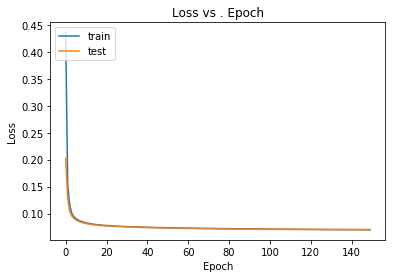

In [19]:
#Plot loss vs epoch  for BCE and MSE [Together or separate, Both accepted]
plt.plot(conv_ae_model_history.history['loss'] )
plt.plot(conv_ae_model_history.history['val_loss'])
plt.title('Loss vs . Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc= 'upper left')
plt.show()

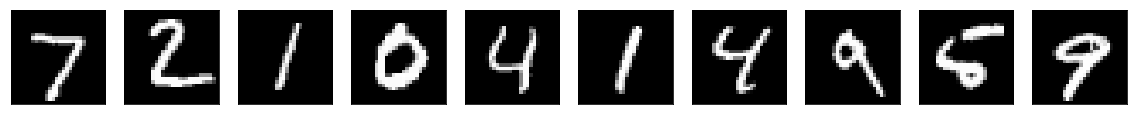

In [20]:
#Show samples of 10 images, their hidden layer representations
plt.figure(figsize=(20, 4))
for i in range (n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(data_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

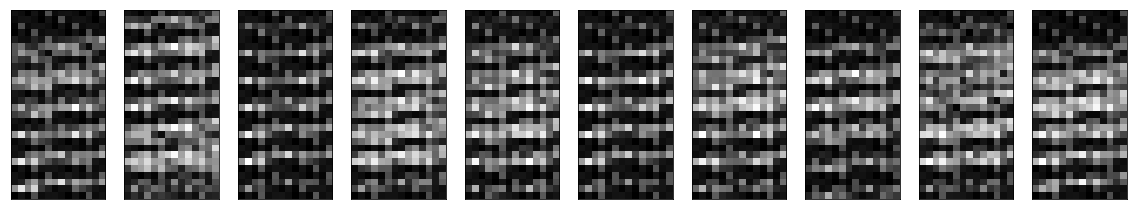

In [21]:
#Bottleneck layer representation
n = 10
plt.figure(figsize=(20, 4))
for i in range (n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(data_test_hidden_layer_rep[i].reshape(28,14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

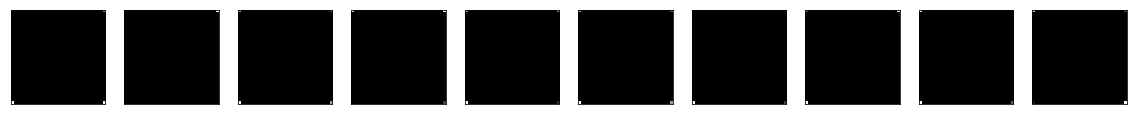

In [22]:
#Reconstruction
n = 10
plt.figure(figsize=(20, 4))
for i in range (n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(reconstructions[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

**Part 2 1b. Loss versus the epochs for Binary Cross Entropy**

In [23]:
def cae_BCE():
    model = Sequential()

    model.add(keras.layers.InputLayer(input_shape = (28,28,1))) #input layer

    model.add (Conv2D(16,                                       #1
                     (3,3),                  
                     activation = 'relu',
                     padding = "same"))
    model.add(MaxPooling2D(pool_size=(2,2),                     #2 hiddenlayer : add a 2x2 maxpooling layer
                           padding='same'))
    model.add (Conv2D(8,                                        #3
                     (3,3),                  
                     activation = 'relu',
                     padding = "same"))
    model.add(MaxPooling2D(pool_size=(2,2),                      #bottleneck: 4 hiddenlayer : add a 2x2 maxpooling layer
                           padding='same'))
    model.add (Conv2D(8,                                         #5
                     (3,3),                  
                     activation = 'relu',
                     padding = "same"))
    model.add(UpSampling2D((2,2)))                               #6
    model.add (Conv2D(16,                                        #7
                     (3,3),                  
                     activation = 'relu',
                     padding = "same"))
    model.add(UpSampling2D((2,2)))                               #8
    model.add (Conv2D(1,                                         #reconstruction: output layer
                     (3,3),                  
                     activation = 'sigmoid',
                     padding = "same"))
    return model

#Create deep autoencoder graph
conv_ae = cae_BCE()

conv_ae.compile(loss ="binary_crossentropy",
                      optimizer="adam")

#Train the model and assign training meta-data to a variable
num_epochs = 150
batch_size = 1024
conv_ae_model_history = conv_ae.fit(data_train,data_train,
                                     validation_data=(data_test,data_test),
                                     epochs=num_epochs,
                                     batch_size=batch_size,
                                     shuffle=True)

#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions = conv_ae.predict(data_test)

#Obtain hidden layer representation for the of input data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])
data_test_hidden_layer_rep = get_hl([data_test])[0]

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 1s 24us/step - loss: 0.5531 - val_loss: 0.3783
Epoch 2/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.2430 - val_loss: 0.1621
Epoch 3/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.1382 - val_loss: 0.1213
Epoch 4/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.1143 - val_loss: 0.1064
Epoch 5/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.1040 - val_loss: 0.0994
Epoch 6/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.0982 - val_loss: 0.0947
Epoch 7/150
60000/60000 [==============================] - 1s 22us/step - loss: 0.0942 - val_loss: 0.0915
Epoch 8/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.0916 - val_loss: 0.0895
Epoch 9/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.0899 - val_loss: 0.0

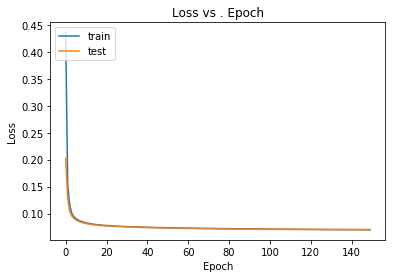

In [18]:
#Plot loss vs epoch  for BCE and MSE [Together or separate, Both accepted]
plt.plot(conv_ae_model_history.history['loss'] )
plt.plot(conv_ae_model_history.history['val_loss'])
plt.title('Loss vs . Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc= 'upper left')
plt.show()

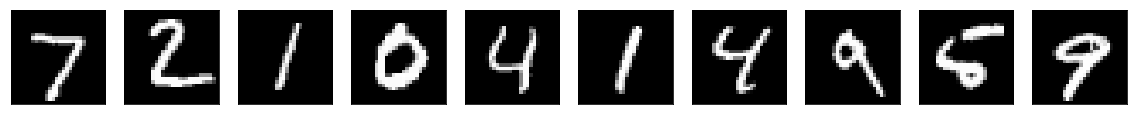

In [25]:
#Show samples of 10 images, their hidden layer representations
plt.figure(figsize=(20, 4))
for i in range (n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(data_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

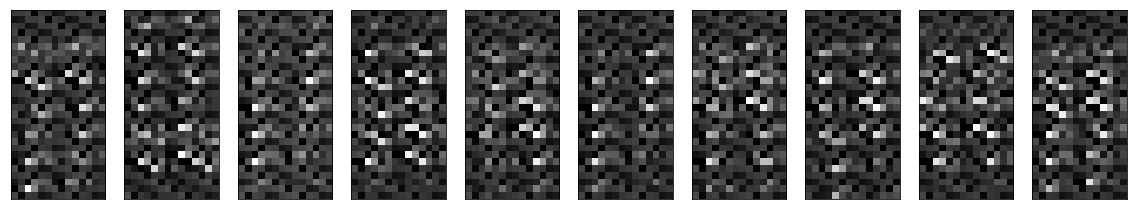

In [26]:
#Bottleneck layer representation
n = 10
plt.figure(figsize=(20, 4))
for i in range (n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(data_test_hidden_layer_rep[i].reshape(28,14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

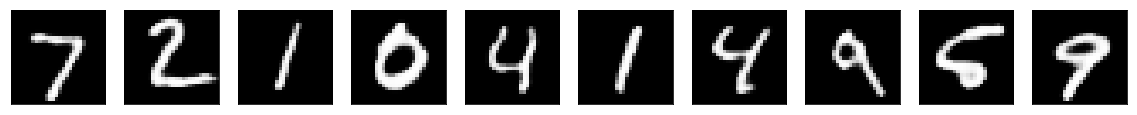

In [27]:
#Reconstruction
n = 10
plt.figure(figsize=(20, 4))
for i in range (n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(reconstructions[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Answer the following questions: 


1.  Question 4: Which loss function is better and why?
    <br>**Binary cross entropy definitely works better than Mean square error. The reconstruction for MSE shows nothing because the input are binary numbers. However, BCE presents the reconstruction as expected.**

#Part 3: Denoising AutoEncoder

In [30]:
#Inject noise into testing data
noise_factor = 0.25
data_train_noisy = data_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_train.shape)
data_test_noisy = data_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_test.shape)

#Clip to stay within valid (normalized) pixel range
data_train_noisy = np.clip(data_train_noisy, 0., 1.)
data_test_noisy = np.clip(data_test_noisy, 0., 1.)

data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

#Reshape data to comply with input of denoising autoencoder
data_train_noisy = data_train.reshape(60000, 28, 28, 1)
data_test_noisy = data_test.reshape(10000, 28, 28, 1)

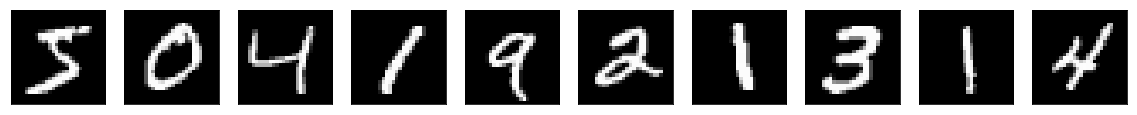

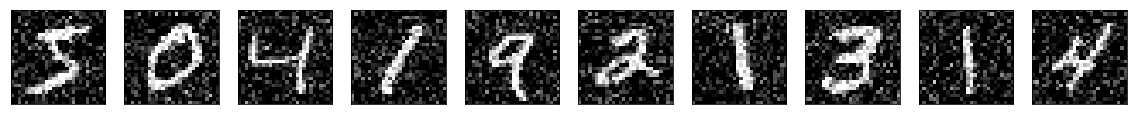

In [26]:
#Show samples of 10 original images and their corrsponding noisy counterparts from the training set
n = 10
plt.figure(figsize=(20, 4))
for i in range (n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(data_train[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.figure(figsize=(20, 4))
for i in range (n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(data_train_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [14]:
#Create denoising autoencoder architecture
def dae():

    model = Sequential()

    model.add(keras.layers.InputLayer(input_shape = (28,28,1))) #input layer

    model.add (Conv2D(16,                                       #1
                     (3,3),                  
                     activation = 'relu',
                     padding = "same"))
    model.add(MaxPooling2D(pool_size=(2,2),                     #2 hiddenlayer : add a 2x2 maxpooling layer
                           padding='same'))
    model.add (Conv2D(8,                                        #3
                     (3,3),                  
                     activation = 'relu',
                     padding = "same"))
    model.add(MaxPooling2D(pool_size=(2,2),                      #bottleneck: 4 hiddenlayer : add a 2x2 maxpooling layer
                           padding='same'))
    model.add (Conv2D(8,                                         #5
                     (3,3),                  
                     activation = 'relu',
                     padding = "same"))
    model.add(UpSampling2D((2,2)))                               #6
    model.add (Conv2D(16,                                        #7
                     (3,3),                  
                     activation = 'relu',
                     padding = "same"))
    model.add(UpSampling2D((2,2)))                               #8
    model.add (Conv2D(1,                                         #reconstruction: output layer
                     (3,3),                  
                     activation = 'sigmoid',
                     padding = "same"))

    return model
  

  
#Compile and train the DAE
conv_ae = dae()

conv_ae.compile(loss ="binary_crossentropy",
                      optimizer="adam")

#Train the model and assign training meta-data to a variable
num_epochs = 150
batch_size = 1024
conv_ae_model_history = conv_ae.fit(data_train_noisy,data_train,
                                     validation_data=(data_test_noisy,data_test),
                                     epochs=num_epochs,
                                     batch_size=batch_size,
                                     shuffle=True)

#reconstructions = conv_ae.predict(data_train)

#Generate denoised versions of noisy inputs
reconstructions = conv_ae.predict(data_test_noisy)


Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 5s 76us/step - loss: 0.4366 - val_loss: 0.2027
Epoch 2/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.1524 - val_loss: 0.1267
Epoch 3/150
60000/60000 [==============================] - 1s 22us/step - loss: 0.1150 - val_loss: 0.1036
Epoch 4/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.1002 - val_loss: 0.0952
Epoch 5/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.0942 - val_loss: 0.0910
Epoch 6/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.0906 - val_loss: 0.0880
Epoch 7/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.0882 - val_loss: 0.0860
Epoch 8/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.0863 - val_loss: 0.0845
Epoch 9/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.0849 - val_loss: 0.0

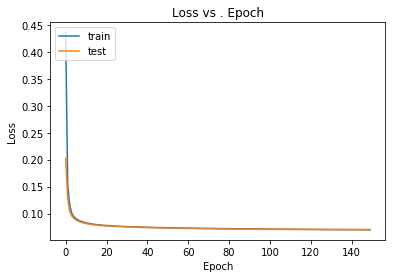

In [17]:
#Plot loss vs epoch
plt.plot(conv_ae_model_history.history['loss'] )
plt.plot(conv_ae_model_history.history['val_loss'])
plt.title('Loss vs . Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc= 'upper left')
plt.show()

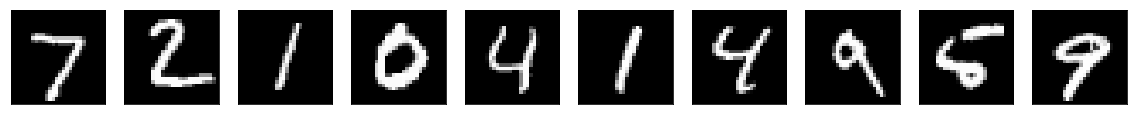

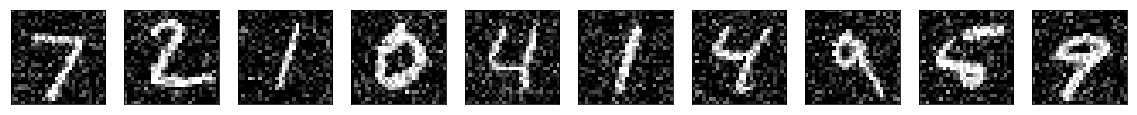

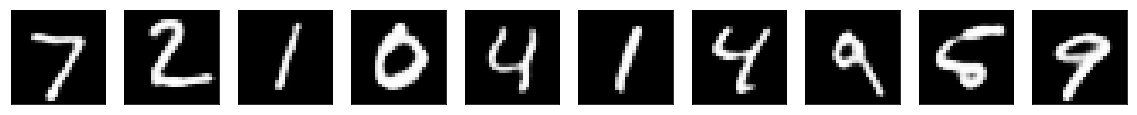

In [31]:
#Show samples of 10 original images, their noisy counterparts, and their de-noised images from the testing set
n = 10
plt.figure(figsize=(20, 4))
for i in range (n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(data_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.figure(figsize=(20, 4))
for i in range (n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(data_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.figure(figsize=(20, 4))
for i in range (n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(reconstructions[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)